(Neural_Network)= 
# Chapter 1 -- Neural Network

In [27]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

Obviously, the perceptron isn't a complete model of human decision-making! But what the example illustrates is how a perceptron can weigh up different kinds of evidence in order to make decisions. And it should seem plausible that a complex network of perceptrons could make quite subtle decisions:

<img src="images/advanced_NeuralNetwork.PNG">
Figure 1.1:  Multilayer Perceptrons

In this network, the first column of perceptrons - what we'll call the first layer of perceptrons - is making three very simple decisions, by weighing the input evidence. What about the perceptrons in the second layer? Each of those perceptrons is making a decision by weighing up the results from the first layer of decision-making. In this way a perceptron in the second layer can make a decision at a more complex and more abstract level than perceptrons in the first layer. And even more complex decisions can be made by the perceptron in the third layer. In this way, a many-layer network of perceptrons can engage in sophisticated decision making.

Incidentally, when I defined perceptrons I said that a perceptron has just a single output. In the network above the perceptrons look like they have multiple outputs. In fact, they're still single output. The multiple output arrows are merely a useful way of indicating that the output from a perceptron is being used as the input to several other perceptrons. It's less unwieldy than drawing a single output line which then splits.

There is another way of representing the neural network. The following structure has one additional neuron for the bias term. The value of it is always $1$.

<img src="images/discretePerceptron.PNG" width="600">
Figure 1.2:  Discrete Perceptron

This is because we would end up the equation we wanted:

$$
h(\vec{x}) = w_1*x_1 + w_2*x_2+ w_3 * x_3 + 1*b
$$ (eq1_1)

Now, in the previous two examples, we have used the step function as the activation function $f(h)$. The function returns 1 when activated and 0 if not activated. This is saying the result is always binary (0 or 1). Succeed completely or utterly failure, getting enrolled or being rejected......This is called the discrete perceptron.

However, this is not as good as it can be. A student scoring 1 mark below the admission line should not receive the same prediction as the student who got 0 in the exam. Although they should all get rejected, the better prediction should give student A a higher chance of getting into the university as he is so close, and should give student B a very low predicted probability as he puts zero effort in revision. 

Another way of thinking this is that in the discrete perceptron model, if the neural network predicts a result to be 1 but actually it is 0, then we can easily replace the 1 with 0 to modify it. However, in a complex neural network, not every result can or should be replaced and modified (over-fitting, explained later). What we want is to make sure the network predicts the result mostly right without making some big mistakes! So we define a new concept called the cost function, which is how far away the predicted result is from the actual result. In that case, we just reduce the degree of how far away we are to improve the model.

The third reason we need to smooth out the step function is that we need to use derivatives to find the minimums, a step function is not derivable.

Anyway, those three thinking lead us to a new activation function -- the sigmoid function:

$$
\sigma (z) = \frac{1}{1+e^{-z}}
$$ (eq1_2)

In [25]:
# make the figure be plotted at the centre
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

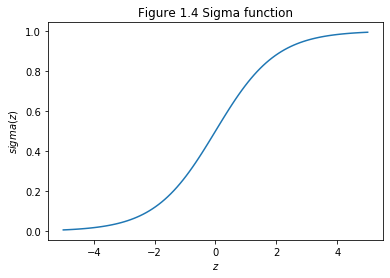

In [26]:
import numpy as np
import matplotlib.pyplot as plt
N  = 100

def main():
    z = np.linspace(-5, 5, N)
    sigma = 1/(1+np.exp(-z))

    plt.figure()
    plt.plot(z, sigma)
    plt.xlabel('$z$')
    plt.ylabel('$sigma(z)$')
    plt.title('Figure 1.4 Sigma function')
    
    plt.show()

if __name__ == '__main__':
    main()

This shape is a smoothed out version of a step function:

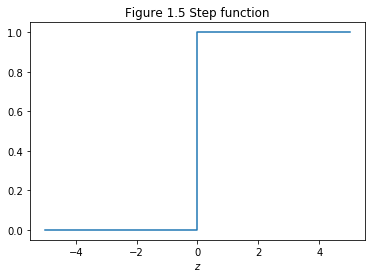

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def main():
   
    x = [-5,0,5] 
    y = [0, 0, 1]
    plt.figure()
    plt.step(x, y)
    plt.xlabel('$z$')
    
    plt.title('Figure 1.5 Step function')
    
    plt.show()

if __name__ == '__main__':
    main()

To put it all a little more explicitly, the output of a sigmoid neuron with inputs $x_1$, $x_2$, ..., weights $w_1$, $w_2$,... , and bias $b$ is

$$
 \frac{1}{1+exp(-\sum_i w_i x_i -b)}
$$ (eq1_3)

To understand the similarity to the perceptron model, suppose $z≡wx+b$ is a large positive number. Then $e^z\approx 0$ and so $\sigma(z) \approx
1$. In other words, when z=w⋅x+b is large and positive, the output from the sigmoid neuron is approximately 1, just as it would have been for a perceptron. Suppose on the other hand that $z=wx+$b is very negative. Then $e^z->\infty$, and $\sigma(z) \approx 0$. So when $z=w⋅x+b$ is very negative, the behaviour of a sigmoid neuron also closely approximates a perceptron. It's only when $wx+b$ is of modest size that there's much deviation from the perceptron model.

The smoothness of $\sigma$ means that small changes $\Delta w_j$ in the weights and $\Delta b$ in the bias will produce a small change $\Delta$ output in the output from the neuron. In fact, calculus tells us that $\Delta$ output is well approximated by

$$
 \Delta output \approx \sum_i \frac{\delta output}{\delta w_i} \Delta w_i +\frac{\delta output}{\delta b_i} \Delta b_i
$$ (eq1_4)

<img src="images/discreteVsQuantify.PNG" width="600">
Figure 1.3:  Discrete vs. Quantify Perceptron